In [31]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [68]:
batch_size = 20

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


## Visualise the image and label

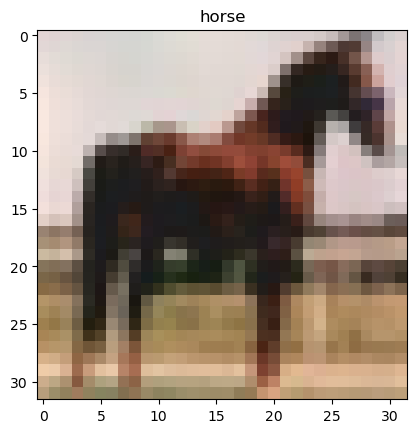

In [53]:
img, label = next(iter(trainloader))
index=int(label[0].item())
plt.title(classes[index])
plt.imshow(img[0].permute(1, 2, 0))

## Basic CNN

In [207]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,32,3,1,1) # first convolutional layer with filter 3x3x32
        self.conv2 = nn.Conv2d(32,64,3,1,1) # second convolutional layer with filter 3x3x64
#         self.fc1 = nn.Linear(2304, 10)
        self.fc1 = nn.Linear(4096, 10)
    
    def forward(self,x):         # input size of 32x32x3
        x=self.conv1(x)          # size change from 32x32x32 -> 30x30x32
        x=F.relu(x)              # activation function of relu
        x=F.max_pool2d(x,2)      # with filter 2x2 and stride 2, size downsample to 30x30x32 -> 15x15x32
        x=self.conv2(x)          # size change to 15x15x32 -> 13x13x64
        x=F.relu(x)              # activation function of relu
        x=F.max_pool2d(x,2)      # with filter 2x2 and stride 2, size downsample to 13x13x64 -> 6x6x64
        x = torch.flatten(x,1)   # convert to 1D of 1x2304
        x = self.fc1(x)          # output size of 1x10
        return x
model=CNN().to(device)

In [209]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [113]:
loss_01_layer=[]
acc_01_layer=[]
loss_001_layer=[]
acc_001_layer=[]
loss_2F_layer=[]
acc_2F_layer=[]

## Train the model

In [210]:
model = model.to(device)
for epoch in range(10):
    train_loss=0.0
    correct=0
    total=0
    for i, (images, labels) in enumerate(trainloader):
        # Forward pass
        images= images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss+=loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy=correct/total
    loss_2F_layer.append(train_loss)
    acc_2F_layer.append(accuracy)
       

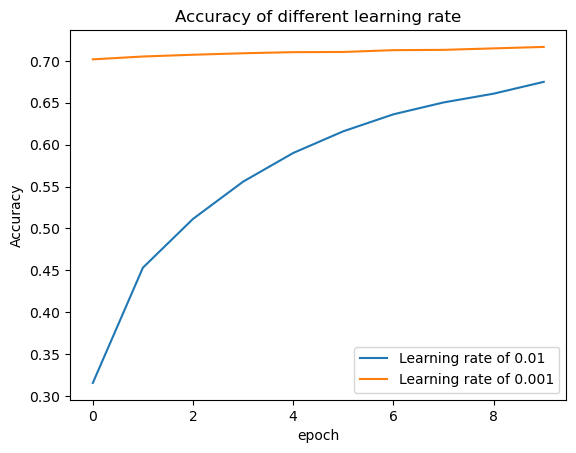

In [182]:
epochs=[]
for i in range(10):
    epochs.append(i)  
plt.plot(epochs, acc_01_layer,label='Learning rate of 0.01')
plt.plot(epochs, acc_001_layer,label='Learning rate of 0.001')
plt.title('Accuracy of different learning rate')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

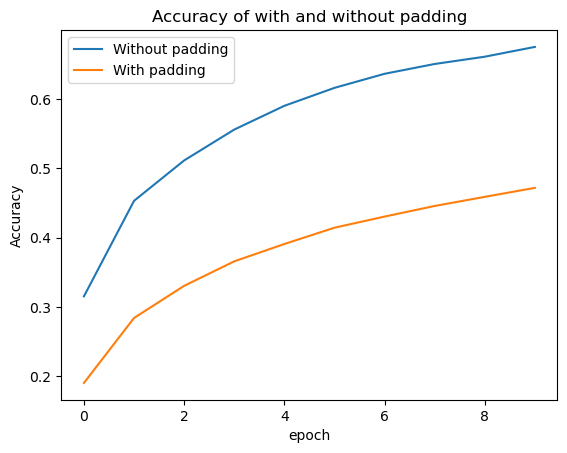

In [211]:
plt.plot(epochs, acc_01_layer,label='Without padding')
plt.plot(epochs, acc_2F_layer,label='With padding')
plt.title('Accuracy of with and without padding')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test the model

In [57]:
model.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images= images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 69.6 %
